In [5]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Strikers_performance.xlsx to Strikers_performance.xlsx


In [9]:
df = pd.read_excel(r"/content/Strikers_performance.xlsx")
df.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333


In [10]:
df.shape

(500, 19)

In [11]:
df.isna().sum()

,0
Striker_ID,0
Nationality,0
Footedness,0
Marital Status,0
Goals Scored,0
Assists,0
Shots on Target,0
Shot Accuracy,0
Conversion Rate,0
Dribbling Success,0


In [12]:
data = df.dropna()
data.isna().sum()


,0
Striker_ID,0
Nationality,0
Footedness,0
Marital Status,0
Goals Scored,0
Assists,0
Shots on Target,0
Shot Accuracy,0
Conversion Rate,0
Dribbling Success,0


In [13]:
data.duplicated().sum()

np.int64(0)

In [14]:
data.dtypes

,0
Striker_ID,int64
Nationality,object
Footedness,object
Marital Status,object
Goals Scored,float64
Assists,float64
Shots on Target,float64
Shot Accuracy,float64
Conversion Rate,float64
Dribbling Success,float64


In [15]:
data = data.drop("Striker_ID", axis=1)

In [16]:
foot = data["Footedness"].value_counts()

<Axes: title={'center': 'Number of Players by Footedness'}, ylabel='count'>

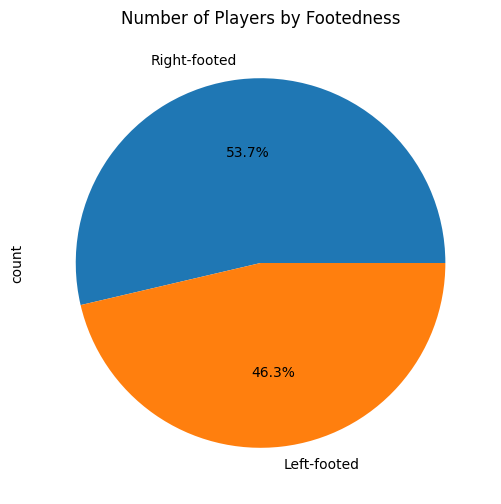

In [17]:
plt.figure(figsize=(13, 6))
plt.title("Number of Players by Footedness")
foot.plot(kind="pie", autopct="%1.1f%%")


In [18]:
data.describe()

,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,15.051286,8.078507,25.741249,0.603665,0.199162,0.701376,69.769593,59.853751,19.572619,39.940610,6.930343,0.744210,0.796016,6.999528,8.077362
std,4.855735,2.933732,7.089340,0.098483,0.048123,0.099590,10.387452,10.193639,4.963218,9.937027,1.938992,0.104170,0.102964,2.096622,2.071574
min,0.000000,0.000000,4.726212,0.305961,0.049024,0.400886,40.705513,35.067292,4.961838,8.232962,2.231386,0.460049,0.529246,0.557967,0.623269
25%,11.498463,6.182395,20.760517,0.539639,0.166234,0.636748,62.663070,52.562805,16.395836,33.438911,5.685446,0.675834,0.723933,5.656504,6.635611
50%,15.063986,8.082806,25.838641,0.599109,0.199628,0.699843,69.617049,60.127467,19.866241,40.023834,6.912446,0.746321,0.795860,6.977491,8.024385
75%,18.183916,9.938872,30.214349,0.669977,0.233346,0.762661,76.952528,66.132264,22.934176,46.669123,8.133822,0.813787,0.870256,8.414982,9.462364
max,34.263657,15.897146,43.211782,0.919311,0.355496,1.000000,98.684031,92.430930,34.073272,71.129102,12.871316,1.000000,1.000000,13.235362,13.730424


In [19]:
nationality_goals = data.groupby("Nationality")["Goals Scored"].mean().round(2)

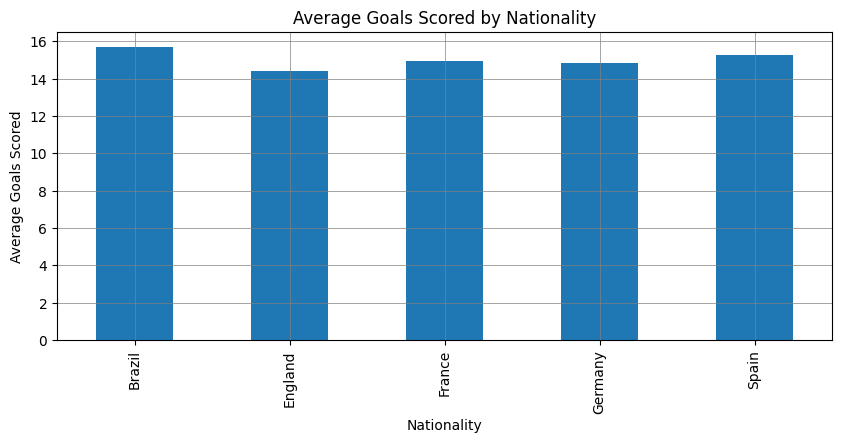

In [20]:
plt.figure(figsize=(10, 4))
plt.title("Average Goals Scored by Nationality")
nationality_goals.plot(kind="bar")
plt.xlabel("Nationality")
plt.ylabel("Average Goals Scored")
plt.grid(color='grey', linestyle='-', linewidth=0.5)

In [21]:
data.groupby("Footedness").agg({"Conversion Rate":"mean"}).round(5)


,Conversion Rate
Footedness,
Left-footed,0.19760
Right-footed,0.20051


In [22]:
data.groupby("Nationality").agg({"Goals Scored": "mean", "Aerial Duels Won": "mean", "Shots on Target":"mean", "Shot Accuracy":"mean",
                                                    "Assists":"mean", "Shot Accuracy":"mean", "Movement off the Ball":"mean", "Hold-up Play":"mean"  }).round(2)

,Goals Scored,Aerial Duels Won,Shots on Target,Shot Accuracy,Assists,Movement off the Ball,Hold-up Play
Nationality,,,,,,,
Brazil,15.73,20.00,25.44,0.61,7.93,70.46,60.59
England,14.44,19.39,26.19,0.59,8.00,69.51,61.24
France,14.96,20.48,26.58,0.59,8.84,69.50,59.25
Germany,14.86,18.54,24.17,0.61,7.87,70.48,58.67
Spain,15.30,19.50,26.17,0.62,7.83,69.06,59.34


In [23]:
num_variables = data.select_dtypes(include = ['number']).columns
selected_columns = ["Goals Scored", "Shots on Target", "Shot Accuracy", "Conversion Rate", "Dribbling Success", "Movement off the Ball"]
correl = data[selected_columns].corr()
correl

,Goals Scored,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball
Goals Scored,1.000000,-0.048233,0.073796,-0.017950,0.061593,0.010463
Shots on Target,-0.048233,1.000000,-0.021141,-0.040403,0.005467,-0.062327
Shot Accuracy,0.073796,-0.021141,1.000000,-0.089808,0.017832,-0.010414
Conversion Rate,-0.017950,-0.040403,-0.089808,1.000000,-0.013788,0.032753
Dribbling Success,0.061593,0.005467,0.017832,-0.013788,1.000000,-0.049281
Movement off the Ball,0.010463,-0.062327,-0.010414,0.032753,-0.049281,1.000000


<Axes: >

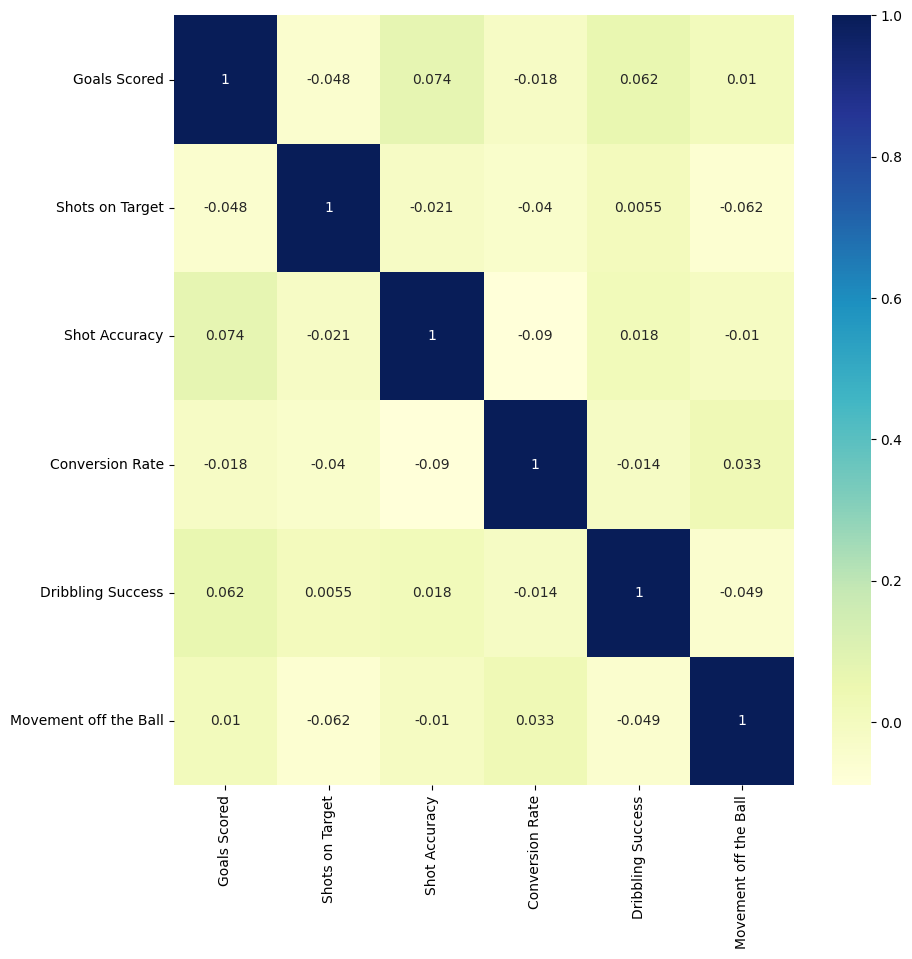

In [24]:
plt.figure(figsize=(10, 10))
sns.heatmap(correl, annot=True, cmap="YlGnBu")

FEATURE ENGINEERING

In [25]:
data["Total goal contribution "] = data["Goals Scored"] + data["Assists"]

In [26]:
data["Total goal contribution "]

,Total goal contribution
0,28.262103
1,28.036928
2,22.042740
3,32.304057
4,19.877305
...,...
495,24.851249
496,23.206829
497,23.970835
498,16.908372


In [27]:
data.head()

,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total goal contribution
0,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388,28.262103
1,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689,28.036928
2,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835,22.042740
3,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653,32.304057
4,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333,19.877305


In [28]:
data["Footedness"] = data["Footedness"].map({"Left-footed":1, "Right-footed":0})
data.head()


,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total goal contribution
0,Spain,1,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388,28.262103
1,France,1,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689,28.036928
2,Germany,1,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835,22.042740
3,France,0,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653,32.304057
4,France,1,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333,19.877305


In [29]:
data["Marital Status"] = data["Marital Status"].map({"No":0, "Yes":1})
data.head(10)

,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total goal contribution
0,Spain,1,0,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388,28.262103
1,France,1,1,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689,28.036928
2,Germany,1,0,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835,22.042740
3,France,0,0,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653,32.304057
4,France,1,1,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333,19.877305
5,Brazil,0,0,13.829315,6.538624,27.754398,0.554677,0.210665,0.617459,56.645184,46.275345,22.962836,43.794054,4.451536,0.834178,0.774195,8.553863,3.516168,20.367939
6,Germany,0,1,22.896064,6.222818,31.266353,0.669639,0.200060,0.994909,74.860363,63.229745,6.478042,46.904727,9.096965,0.644878,0.926858,10.215830,8.410911,29.118882
7,Germany,0,0,18.837174,5.408028,29.446203,0.695531,0.159146,0.824468,54.526960,59.389960,16.850577,42.656170,7.975550,0.496823,0.849141,9.706907,6.448787,24.245201
8,Germany,0,1,12.652628,8.145565,32.346869,0.608841,0.232962,0.564893,80.826911,65.002405,17.558631,46.577632,5.531533,0.727289,0.677678,9.693143,6.399329,20.798193
9,France,1,1,17.712800,5.507150,21.253354,0.747753,0.246879,0.567754,65.288753,54.663997,23.166634,39.304677,6.716941,0.735824,0.942463,9.887341,7.002025,23.219950


In [30]:
dummies = pd.get_dummies(data[["Nationality"]], dtype=int)
dummies

,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
495,0,1,0,0,0
496,0,0,0,1,0
497,0,1,0,0,0
498,0,1,0,0,0


In [31]:
data = pd.concat([data, dummies], axis = 1)

data.head()

,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total goal contribution,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain
0,Spain,1,0,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,...,0.820314,0.922727,8.570370,11.451388,28.262103,0,0,0,0,1
1,France,1,1,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,...,0.803321,0.678984,3.444638,8.243689,28.036928,0,0,1,0,0
2,Germany,1,0,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,...,0.766540,0.843858,8.429491,9.506835,22.042740,0,0,0,1,0
3,France,0,0,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,...,0.611798,0.662997,6.532552,8.199653,32.304057,0,0,1,0,0
4,France,1,1,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,...,0.701638,0.906538,8.414915,6.665333,19.877305,0,0,1,0,0


In [32]:
from sklearn.cluster import KMeans

In [33]:
wcss = []

y = data[["Total goal contribution ", "Goals Scored", "Assists"]]
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(y)
    wcss_score = kmeans.inertia_
    wcss.append(wcss_score)

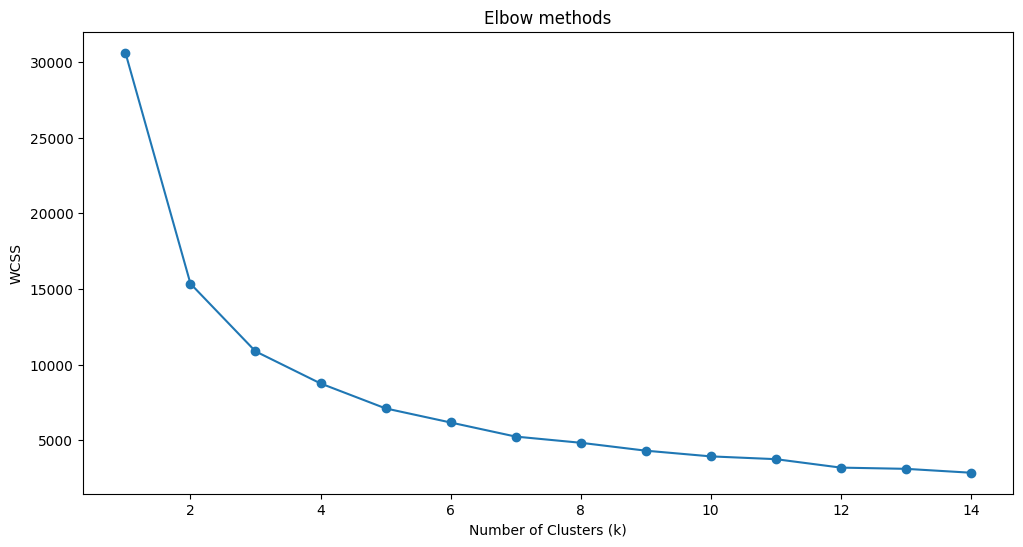

In [34]:
plt.figure(figsize = (12, 6))
plt.plot(range(1, 15), wcss, marker = 'o')
plt.title('Elbow methods')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [37]:
final_km = KMeans(n_clusters = 2)
final_km.fit(y)

labels = final_km.labels_
labels

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,

In [38]:
data['Clusters'] = labels
data.head()

,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total goal contribution,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Clusters
0,Spain,1,0,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,...,0.922727,8.570370,11.451388,28.262103,0,0,0,0,1,0
1,France,1,1,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,...,0.678984,3.444638,8.243689,28.036928,0,0,1,0,0,0
2,Germany,1,0,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,...,0.843858,8.429491,9.506835,22.042740,0,0,0,1,0,0
3,France,0,0,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,...,0.662997,6.532552,8.199653,32.304057,0,0,1,0,0,0
4,France,1,1,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,...,0.906538,8.414915,6.665333,19.877305,0,0,1,0,0,1


In [39]:
round(data.groupby('Clusters')[["Total goal contribution ", "Goals Scored", "Assists"]].mean(), 2)

,Total goal contribution,Goals Scored,Assists
Clusters,,,
0,27.61,18.87,8.74
1,19.17,11.67,7.49


In [40]:
mapping = {0:'Regular Striker', 1:'Good striker'}
data['Striker_types'] = data['Clusters'].map(mapping)

data.head()

,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Impact on Team Performance,Off-field Conduct,Total goal contribution,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Clusters,Striker_types
0,Spain,1,0,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,...,8.570370,11.451388,28.262103,0,0,0,0,1,0,Regular Striker
1,France,1,1,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,...,3.444638,8.243689,28.036928,0,0,1,0,0,0,Regular Striker
2,Germany,1,0,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,...,8.429491,9.506835,22.042740,0,0,0,1,0,0,Regular Striker
3,France,0,0,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,...,6.532552,8.199653,32.304057,0,0,1,0,0,0,Regular Striker
4,France,1,1,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,...,8.414915,6.665333,19.877305,0,0,1,0,0,1,Good striker


In [41]:
data.columns

Index(['Nationality', 'Footedness', 'Marital Status', 'Goals Scored',
       'Assists', 'Shots on Target', 'Shot Accuracy', 'Conversion Rate',
       'Dribbling Success', 'Movement off the Ball', 'Hold-up Play',
       'Aerial Duels Won', 'Defensive Contribution', 'Big Game Performance',
       'Consistency', 'Penalty Success Rate', 'Impact on Team Performance',
       'Off-field Conduct', 'Total goal contribution ', 'Nationality_Brazil',
       'Nationality_England', 'Nationality_France', 'Nationality_Germany',
       'Nationality_Spain', 'Clusters', 'Striker_types'],
      dtype='object')

In [42]:
x = data.drop(["Nationality", "Striker_types"], axis = 1)
y = data["Clusters"]


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)
scaled_x

array([[ 1.07605517, -1.03306674,  0.5014195 , ..., -0.4763745 ,
         1.87450299, -1.06295349],
       [ 1.07605517,  0.96799167, -0.15308985, ..., -0.4763745 ,
        -0.53347474, -1.06295349],
       [ 1.07605517, -1.03306674,  0.65703761, ...,  2.09918875,
        -0.53347474, -1.06295349],
       ...,
       [ 1.07605517,  0.96799167, -0.20676595, ..., -0.4763745 ,
        -0.53347474,  0.94077493],
       [-0.92932038,  0.96799167, -0.9131236 , ..., -0.4763745 ,
        -0.53347474,  0.94077493],
       [ 1.07605517, -1.03306674, -1.43590515, ..., -0.4763745 ,
        -0.53347474,  0.94077493]])

In [44]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix
model = LogisticRegression(penalty='l2', C=1.0)
l_gr = model.fit(x_train, y_train)
y_pred = l_gr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print(accuracy_lgr*100,'%')

100.0 %


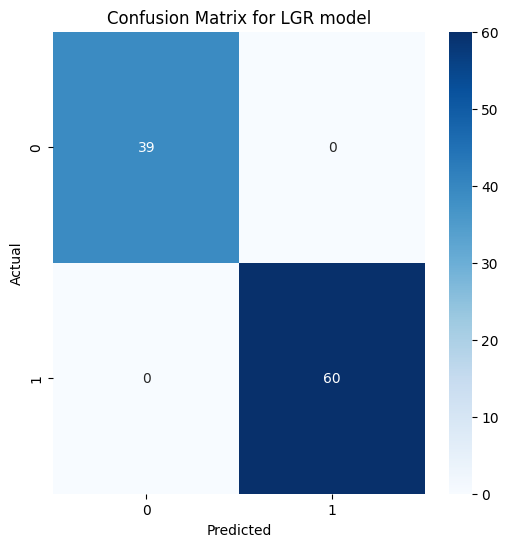

In [46]:
conf_matrix_lgr = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (6, 6))
sns.heatmap(conf_matrix_lgr, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix for LGR model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
from sklearn.metrics import precision_score

prec_xg = precision_score(y_test, y_pred)
prec_xg

1.0

In [48]:

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='binary')
recall

1.0

In [49]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

model = LogisticRegression(max_iter=1000)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, scaled_x, y, cv=skf, scoring='accuracy')

print(f"Stratified K-Fold Accuracy Scores: {scores}")
print(f"Average Accuracy: {scores.mean():.4f}")

Stratified K-Fold Accuracy Scores: [1. 1. 1. 1. 1.]
Average Accuracy: 1.0000
